## BE Comps
## Name    :   Pritam Rao
## UID     :   2018130044
## Roll No :   48


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.simplefilter("ignore")
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_recall_fscore_support

In [2]:
df = pd.read_csv("../input/echocardiogram-uci/echocardiogram.csv")
df.head()

,survival,alive,age,pericardialeffusion,fractionalshortening,epss,lvdd,wallmotion-score,wallmotion-index,mult,name,group,aliveat1
0,11.0,0.0,71.0,0.0,0.260,9.000,4.600,14.0,1.00,1.000,name,1,0.0
1,19.0,0.0,72.0,0.0,0.380,6.000,4.100,14.0,1.70,0.588,name,1,0.0
2,16.0,0.0,55.0,0.0,0.260,4.000,3.420,14.0,1.00,1.000,name,1,0.0
3,57.0,0.0,60.0,0.0,0.253,12.062,4.603,16.0,1.45,0.788,name,1,0.0
4,19.0,1.0,57.0,0.0,0.160,22.000,5.750,18.0,2.25,0.571,name,1,0.0


## Data Set Information:

All the patients suffered heart attacks at some point in the past. Some are still alive and some are not. The survival and still-alive variables, when taken together, indicate whether a patient survived for at least one year following the heart attack.

**The problem addressed by past researchers was to predict from the other variables whether or not the patient will survive at least one year. The most difficult part of this problem is correctly predicting that the patient will NOT survive.** 

## Attribute Information:

- 1. survival -- the number of months patient survived (has survived, if patient is still alive). Because all the patients had their heart attacks at different times, it is possible that some patients have survived less than one year but they are still alive. Check the second variable to confirm this. Such patients cannot be used for the prediction task mentioned above.
- 2. still-alive -- a binary variable. 0=dead at end of survival period, 1 means still alive
- 3. age-at-heart-attack -- age in years when heart attack occurred
- 4. pericardial-effusion -- binary. Pericardial effusion is fluid around the heart. 0=no fluid, 1=fluid
- 5. fractional-shortening -- a measure of contracility around the heart lower numbers are increasingly abnormal
- 6. epss -- E-point septal separation, another measure of contractility. Larger numbers are increasingly abnormal.
- 7. lvdd -- left ventricular end-diastolic dimension. This is a measure of the size of the heart at end-diastole. Large hearts tend to be sick hearts.
- 8. wall-motion-score -- a measure of how the segments of the left ventricle are moving
- 9. wall-motion-index -- equals wall-motion-score divided by number of segments seen. Usually 12-13 segments are seen in an echocardiogram. Use this variable INSTEAD of the wall motion score.
- 10. mult -- a derivate var which can be ignored
- 11. name -- the name of the patient (I have replaced them with "name")
- 12. group -- meaningless, ignore it
- 13. alive-at-1 -- Boolean-valued. Derived from the first two attributes. 0 means patient was either dead after 1 year or had been followed for less than 1 year. 1 means patient was alive at 1 year.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   survival              130 non-null    float64
 1   alive                 131 non-null    float64
 2   age                   126 non-null    float64
 3   pericardialeffusion   132 non-null    float64
 4   fractionalshortening  124 non-null    float64
 5   epss                  117 non-null    float64
 6   lvdd                  121 non-null    float64
 7   wallmotion-score      128 non-null    float64
 8   wallmotion-index      130 non-null    float64
 9   mult                  129 non-null    float64
 10  name                  131 non-null    object 
 11  group                 110 non-null    object 
 12  aliveat1              75 non-null     float64
dtypes: float64(11), object(2)
memory usage: 13.6+ KB


In [4]:
df.head()

,survival,alive,age,pericardialeffusion,fractionalshortening,epss,lvdd,wallmotion-score,wallmotion-index,mult,name,group,aliveat1
0,11.0,0.0,71.0,0.0,0.260,9.000,4.600,14.0,1.00,1.000,name,1,0.0
1,19.0,0.0,72.0,0.0,0.380,6.000,4.100,14.0,1.70,0.588,name,1,0.0
2,16.0,0.0,55.0,0.0,0.260,4.000,3.420,14.0,1.00,1.000,name,1,0.0
3,57.0,0.0,60.0,0.0,0.253,12.062,4.603,16.0,1.45,0.788,name,1,0.0
4,19.0,1.0,57.0,0.0,0.160,22.000,5.750,18.0,2.25,0.571,name,1,0.0


In [5]:
## since we can't consider such cases hence dropping them where survival < 12 && alive == 1 drop 

indexes = df[ (df['survival'] < 12) & (df['alive'] == 1) ].index
df.drop(indexes,inplace=True)

In [6]:
df.shape # earlier we had 133 rows

(99, 13)

In [7]:
## There are only two categorical variables but one of them is name which is meaningless and the other one according 
## to the data sources is meaningless to and should be ignored
df.drop(columns=['name','group'],inplace=True)
df.head()

,survival,alive,age,pericardialeffusion,fractionalshortening,epss,lvdd,wallmotion-score,wallmotion-index,mult,aliveat1
0,11.0,0.0,71.0,0.0,0.260,9.000,4.600,14.0,1.00,1.000,0.0
1,19.0,0.0,72.0,0.0,0.380,6.000,4.100,14.0,1.70,0.588,0.0
2,16.0,0.0,55.0,0.0,0.260,4.000,3.420,14.0,1.00,1.000,0.0
3,57.0,0.0,60.0,0.0,0.253,12.062,4.603,16.0,1.45,0.788,0.0
4,19.0,1.0,57.0,0.0,0.160,22.000,5.750,18.0,2.25,0.571,0.0


In [8]:
df.describe()

,survival,alive,age,pericardialeffusion,fractionalshortening,epss,lvdd,wallmotion-score,wallmotion-index,mult,aliveat1
count,96.000000,97.000000,94.000000,98.000000,94.000000,88.000000,93.000000,96.000000,97.000000,97.000000,52.000000
mean,29.369792,0.092784,61.531915,0.928571,0.229947,11.047102,4.679161,13.552187,1.270876,0.802784,0.057692
std,11.829545,0.291636,7.953767,7.771545,0.109217,6.929387,0.824782,3.779910,0.344818,0.229436,0.307645
min,9.000000,0.000000,35.000000,0.000000,0.030000,0.000000,2.320000,2.000000,1.000000,0.357000,0.000000
25%,20.750000,0.000000,57.000000,0.000000,0.150000,6.450000,4.160000,11.000000,1.000000,0.714000,0.000000
50%,28.000000,0.000000,61.000000,0.000000,0.224000,9.400000,4.550000,13.500000,1.140000,0.786000,0.000000
75%,36.000000,0.000000,66.000000,0.000000,0.290000,13.775000,5.250000,15.125000,1.390000,0.857000,0.000000
max,57.000000,1.000000,81.000000,77.000000,0.610000,31.000000,6.780000,23.000000,2.390000,2.000000,2.000000


## Univariate Analysis

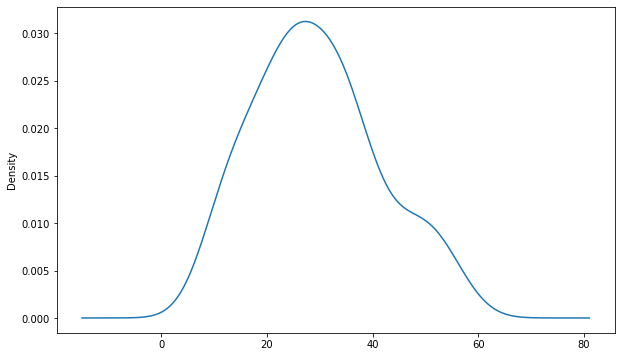

In [9]:
plt.figure(figsize=(10,6))
df['survival'].plot(kind='density');
## survival has bell shaped with very few outliers and most of the patients after suffering heartattack die after a max period of 2 year 

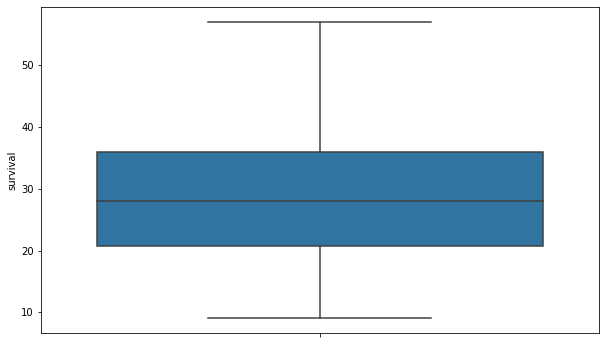

In [10]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,y='survival');

## 50% of the patient data survival is between 20-35 months

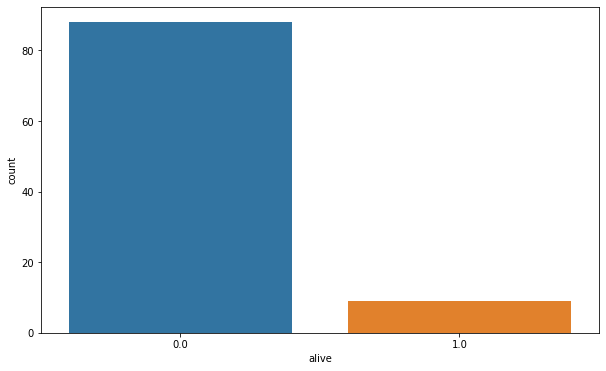

In [11]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='alive');

## There is a high imbalance in the dataset as very few patients survived 

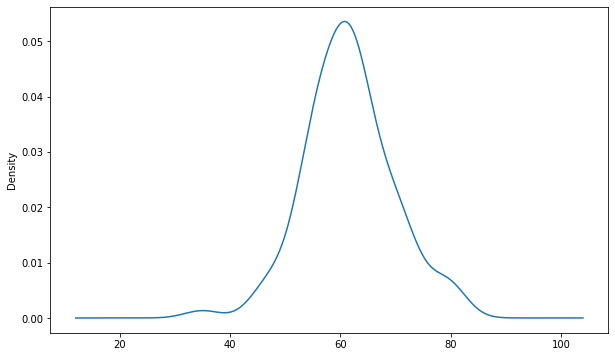

In [12]:
plt.figure(figsize=(10,6))
df['age'].plot(kind='density');

## 50% of our data represents patient from age 40-80 with mean being 60 that means any 
## person bw these age have a 50% likely chance to have heartattck 

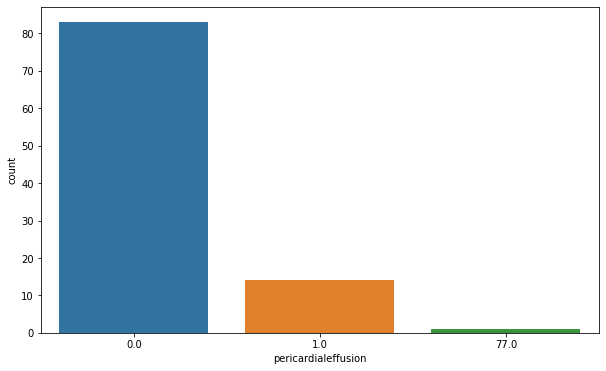

In [13]:
## binary. Pericardial effusion is fluid around the heart. 0=no fluid, 1=fluid 
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='pericardialeffusion');

In [14]:
indexes = df[ (df['pericardialeffusion'] == 77) ].index
df.drop(indexes,inplace=True)

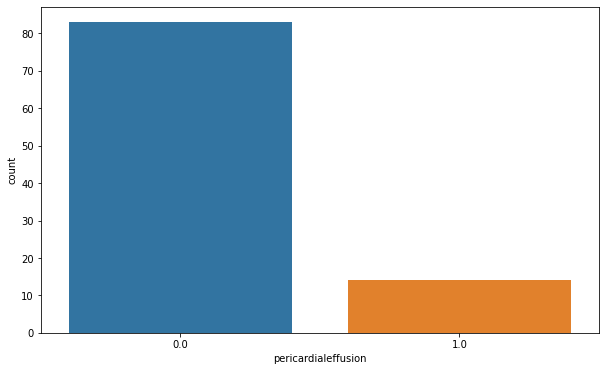

In [15]:
## binary. Pericardial effusion is fluid around the heart. 0=no fluid, 1=fluid 
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='pericardialeffusion');

## Pericardial effusion can put pressure on the heart, affecting how the heart works. 
## If untreated, it may lead to heart failure or death in extreme cases

## hypothesis can be Pericardial effusion leads to death earlier 

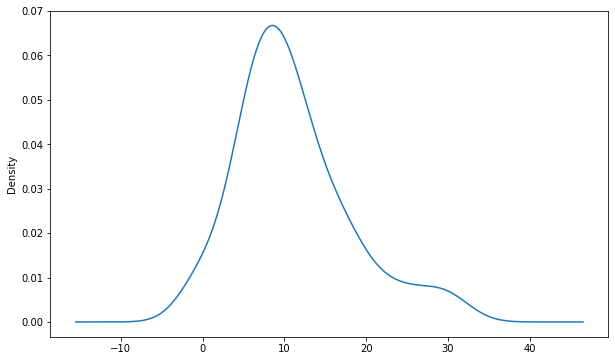

In [16]:
plt.figure(figsize=(10,6))
df['epss'].plot(kind='density');
#df['fractionalshortening']
#df['epss']


## a measure of contracility around the heart lower numbers are increasingly abnormal

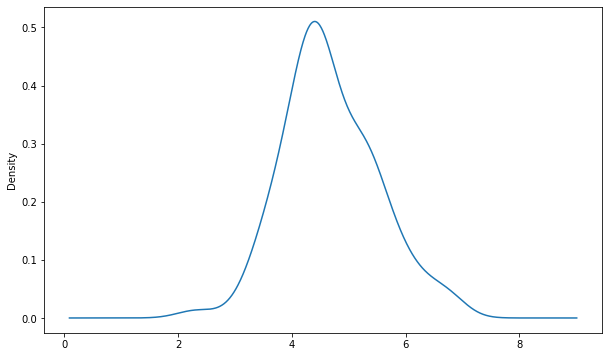

In [17]:
#lvdd -- left ventricular end-diastolic dimension. This is a measure of the size of the heart at end-diastole. Large hearts tend to be sick hearts.
plt.figure(figsize=(10,6))
df['lvdd'].plot(kind='density');

## very few sick hearts as very less number of large values

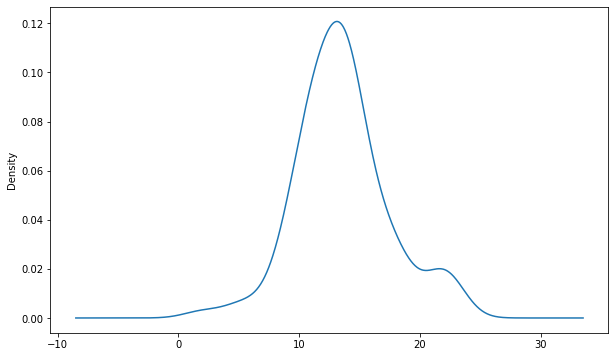

In [18]:
#wall-motion-score -- a measure of how the segments of the left ventricle are moving
plt.figure(figsize=(10,6))
df['wallmotion-score'].plot(kind='density');

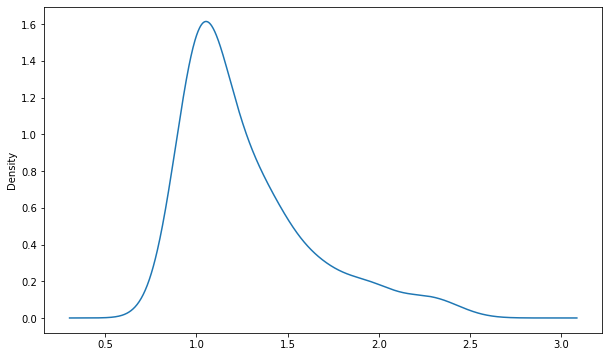

In [19]:
#wall-motion-index -- equals wall-motion-score divided by number of segments seen. 
# Usually 12-13 segments are seen in an echocardiogram. Use this variable INSTEAD of the wall motion score.
plt.figure(figsize=(10,6))
df['wallmotion-index'].plot(kind='density');

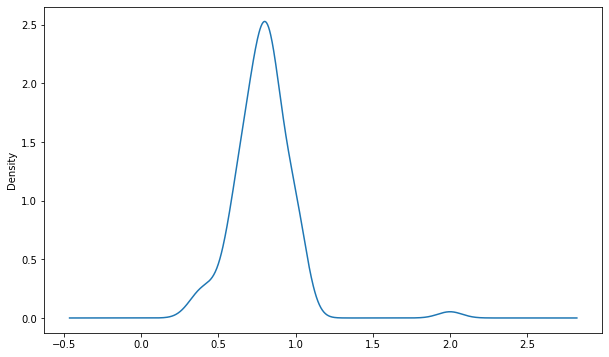

In [20]:
#mult -- a derivate var which can be ignored
plt.figure(figsize=(10,6))
df['mult'].plot(kind='density');

## Inference
- We have data that ranges from mutlivalue range
- most of the data is skewed normal distribution
- output variable is highly imbalanced

## Bivariate Analysis

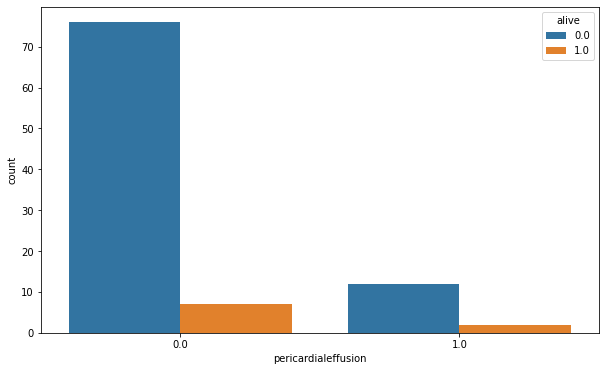

In [21]:
## binary. Pericardial effusion is fluid around the heart. 0=no fluid, 1=fluid 
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='pericardialeffusion',hue='alive');

# 1 out of 10 dies if precardial effusion above hypothesis is true

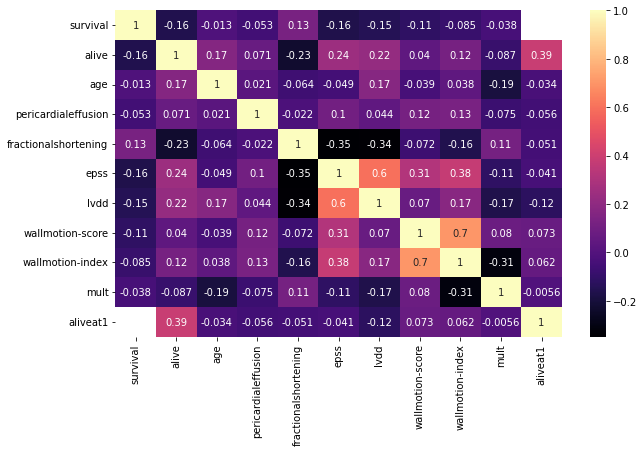

In [22]:
df_corr = df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(df_corr,cmap='magma',annot=True);

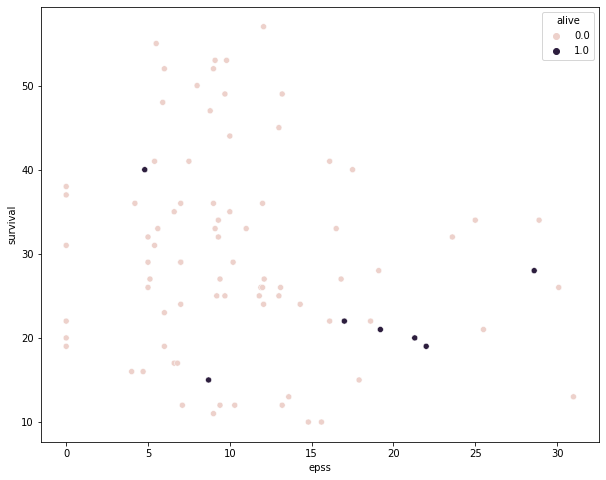

In [23]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df,x='epss',y='survival',hue='alive');


## large values tends to show more death rate

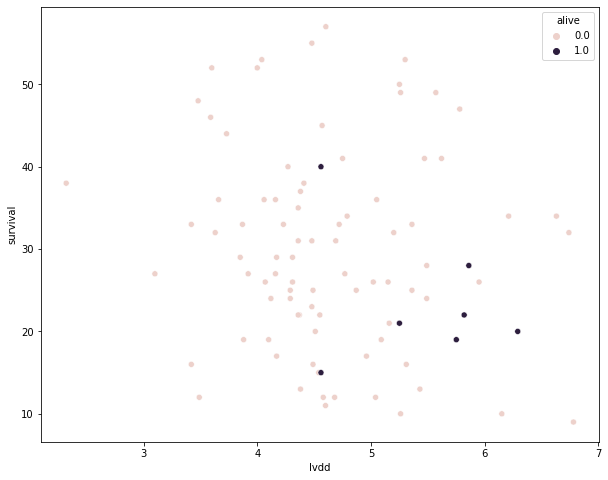

In [24]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df,x='lvdd',y='survival',hue='alive');


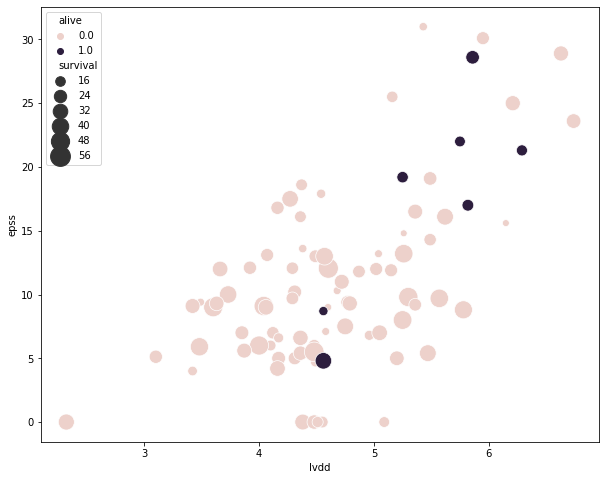

In [25]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df,x='lvdd',y='epss',hue='alive',size='survival',sizes=(40, 400));


## lvdd -- left ventricular end-diastolic dimension. This is a measure of the size of the heart at end-diastole. 

## epss -- E-point septal separation, another measure of contractility


# they both are positively related and causes more more deaths as value increases and low survival and more survival rate when value is 
# normal

In [26]:
df.columns

Index(['survival', 'alive', 'age', 'pericardialeffusion',
       'fractionalshortening', 'epss', 'lvdd', 'wallmotion-score',
       'wallmotion-index', 'mult', 'aliveat1'],
      dtype='object')

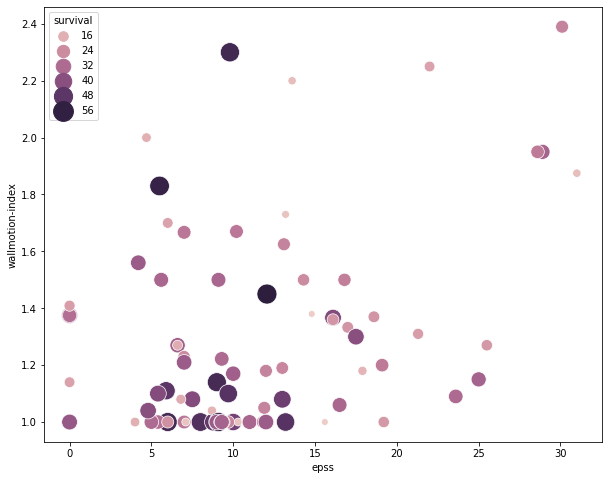

In [27]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df,x='epss',y='wallmotion-index',hue='survival',size='survival',sizes=(40, 400));

## wall-motion-index -- a measure of how the segments of the left ventricle are moving
##  epss -- E-point septal separation, another measure of contractility

## High survival rate when wallmotionindex is low and epss is mid to low 

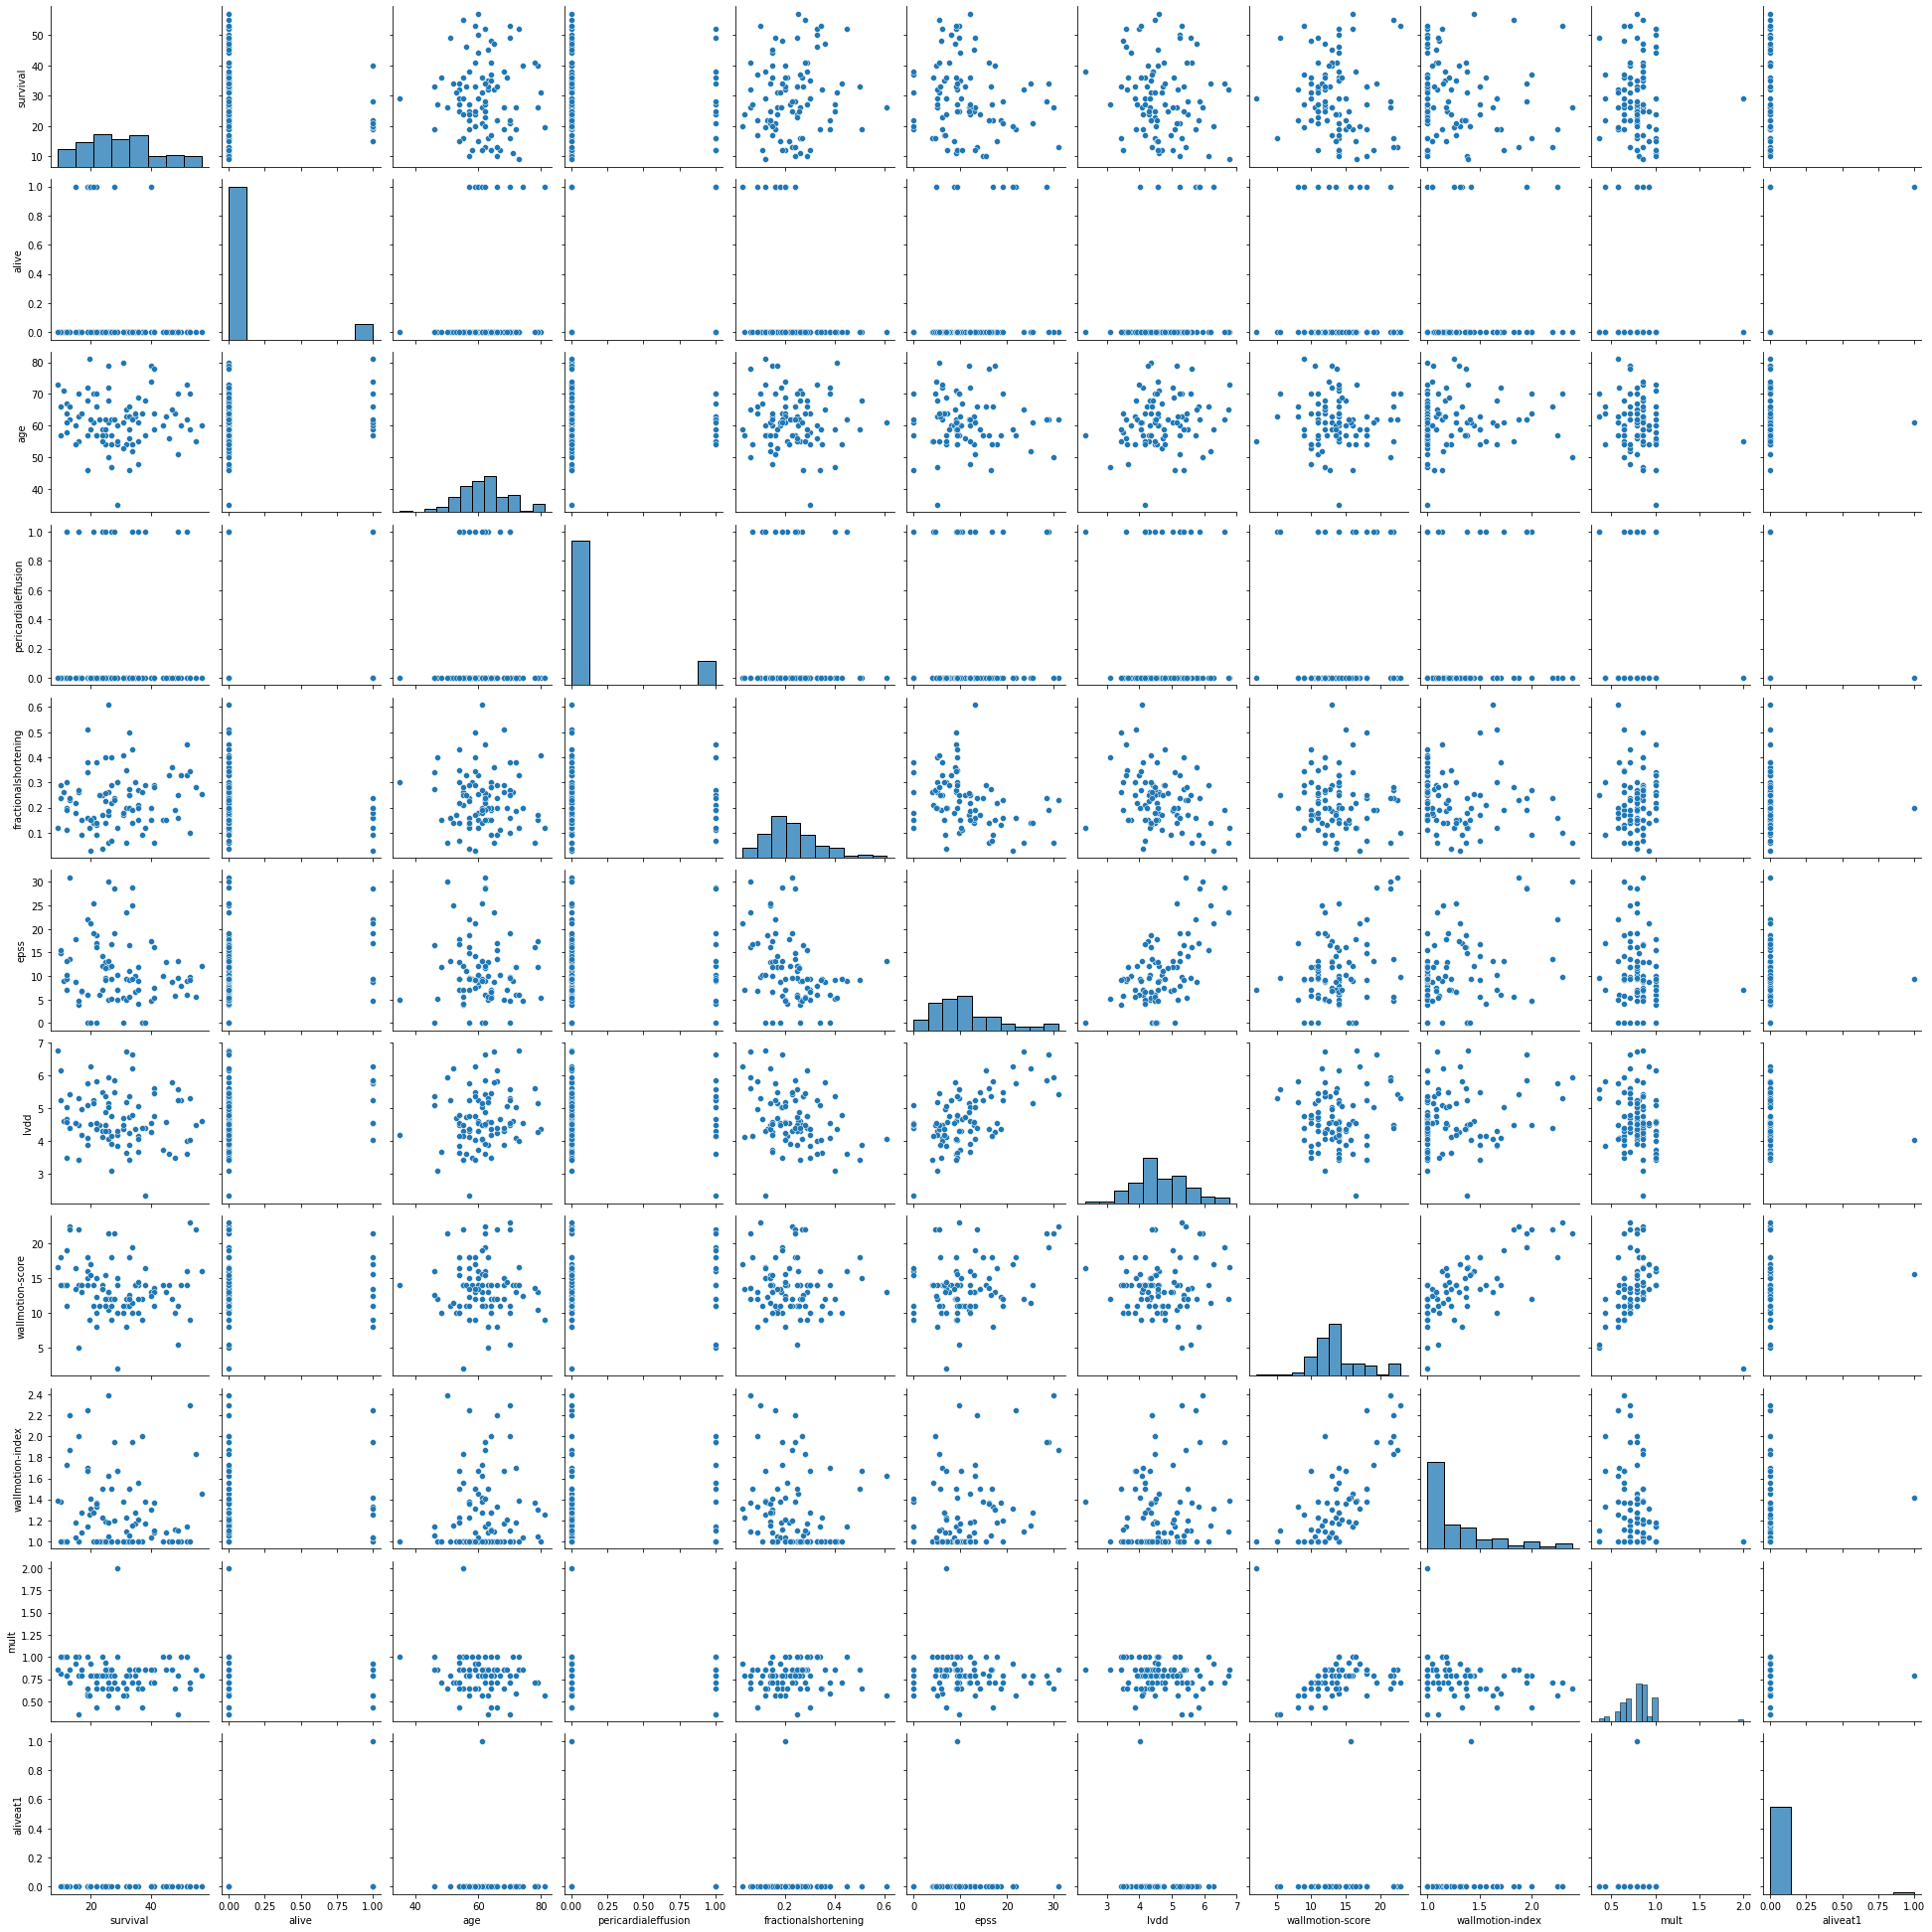

In [28]:
sns.pairplot(df);

In [29]:
# ['fractionalshortening'] {}
# survival but were they alive ??
# pericardialeffusion and survival 

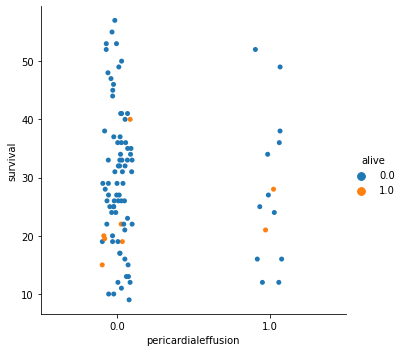

In [30]:
sns.catplot(x="pericardialeffusion", y="survival", hue='alive',data=df);


## Data Preprocessing

In [31]:
df.isna().sum()

survival                 2
alive                    1
age                      4
pericardialeffusion      1
fractionalshortening     4
epss                    10
lvdd                     5
wallmotion-score         2
wallmotion-index         1
mult                     2
aliveat1                47
dtype: int64

In [32]:
df.fillna(df.median(),inplace=True)
df.isna().sum()

survival                0
alive                   0
age                     0
pericardialeffusion     0
fractionalshortening    0
epss                    0
lvdd                    0
wallmotion-score        0
wallmotion-index        0
mult                    0
aliveat1                0
dtype: int64

In [33]:
X = df.drop(['survival','alive'], axis=1)
y = df['alive']
X_std = StandardScaler().fit_transform(X)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.1,stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((88, 9), (10, 9), (88,), (10,))

## Classification Modelling

In [35]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Logistic Regression accuracy score : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

precision_recall_fscore_support(y_test, y_pred,average='weighted') 

Logistic Regression accuracy score : 0.9000


(0.8099999999999999, 0.9, 0.8526315789473685, None)

In [36]:
from sklearn.svm import SVC
svc = SVC(gamma='auto')
svc.fit(X, y)
y_pred = svc.predict(X_test)

print('SVM accuracy score : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
precision_recall_fscore_support(y_test, y_pred,average='weighted') 

SVM accuracy score : 0.9000


(0.8099999999999999, 0.9, 0.8526315789473685, None)

## PCA

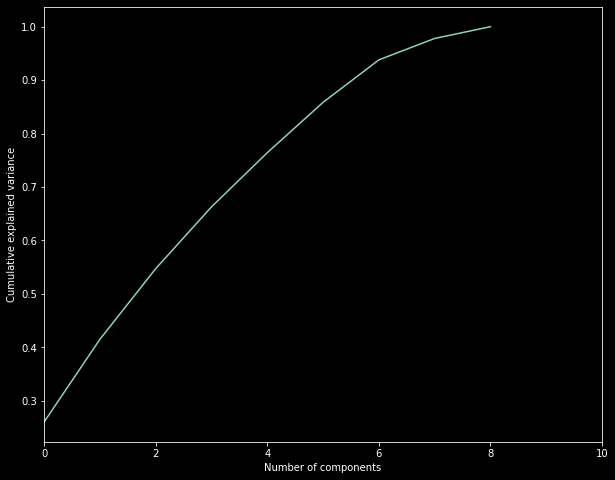

In [37]:
pca = PCA().fit(X_std)

with plt.style.context('dark_background'):
    plt.figure(figsize=(10,8))
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlim(0,10,1)
    plt.xlabel('Number of components')
    plt.ylabel('Cumulative explained variance');

## We have total of 9 components out of which the starting 6 helps in producing more than 90% of the information 
## so we can drop that last 3 components if we wish to

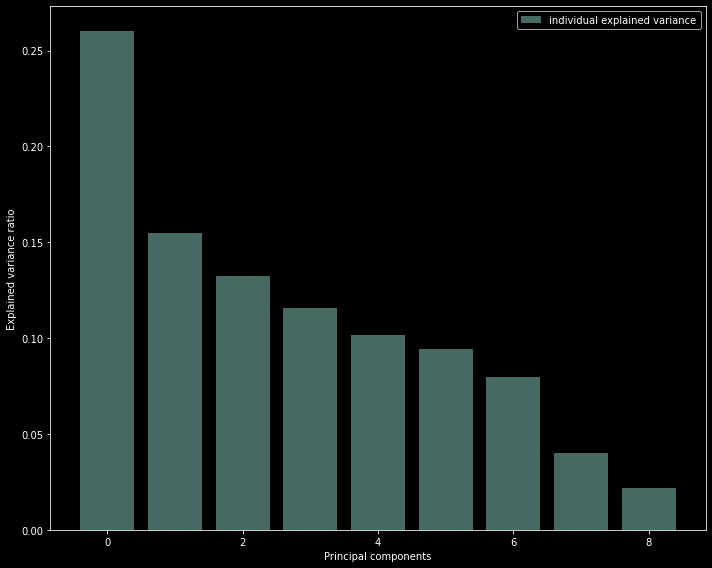

In [38]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(10, 8))

    plt.bar(range(9), pca.explained_variance_ratio_, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()
    
### The first principal component holds 28% of the data information
### There is great information change from 1st to 2nd component after that the information change is gradual 

In [39]:
temp = PCA(n_components=2)
principalComponents = temp.fit_transform(X_train)

In [40]:
c1,c2=list(),list()

for x,y in principalComponents:
    c1.append(x)
    c2.append(y)
  

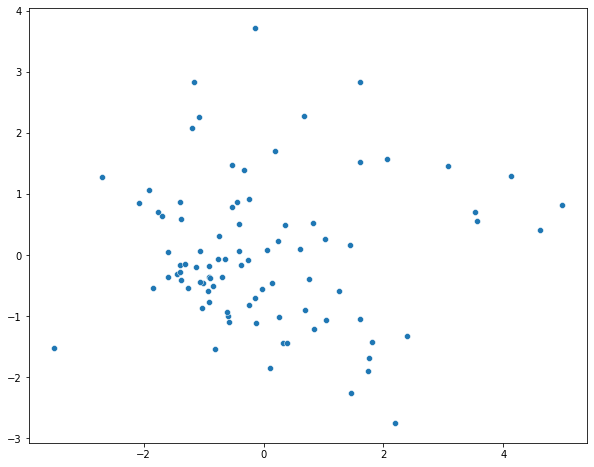

In [41]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=c1,y=c2);

## In theory the components are orthogonal that means no relation between them which is shown from the data 

In [42]:
X = df.drop(['survival','alive'], axis=1)
y = df['alive']
X_std = StandardScaler().fit_transform(X)

In [43]:
svc = SVC(gamma='auto')
pca_clf = PCA(n_components=2) # picking only 2 components
principalComponents = pca_clf.fit_transform(X_std)
principalComponents.shape

(98, 2)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(principalComponents, y, test_size=0.1,stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((88, 2), (10, 2), (88,), (10,))

In [45]:
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

print('SVM accuracy score : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
precision_recall_fscore_support(y_test, y_pred,average='weighted') 


## Even with only starting two components the model seems to be performing same as with all 9 variables 

SVM accuracy score : 0.9000


(0.8099999999999999, 0.9, 0.8526315789473685, None)

### Conclusion
 
- From 14 features, if only first 2 are taken then the accuracy was found to be the highest(90 %)
- When model was trained using all the features then the accuracy was found to be 81% Hence having low dimesional rich features increases model performace and saves time and memory too.  